In [1]:
import time, os, cv2, psutil
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import entropy
import seaborn as sns

from tqdm.notebook import tqdm

In [2]:
print(cv2.getBuildInformation())


General configuration for OpenCV 4.10.0 =====================================
  Version control:               4.10.0

  Platform:
    Timestamp:                   2024-06-17T17:58:36Z
    Host:                        Windows 10.0.17763 AMD64
    CMake:                       3.24.2
    CMake generator:             Visual Studio 14 2015
    CMake build tool:            MSBuild.exe
    MSVC:                        1900
    Configuration:               Debug Release

  CPU/HW features:
    Baseline:                    SSE SSE2 SSE3
      requested:                 SSE3
    Dispatched code generation:  SSE4_1 SSE4_2 FP16 AVX AVX2
      requested:                 SSE4_1 SSE4_2 AVX FP16 AVX2 AVX512_SKX
      SSE4_1 (16 files):         + SSSE3 SSE4_1
      SSE4_2 (1 files):          + SSSE3 SSE4_1 POPCNT SSE4_2
      FP16 (0 files):            + SSSE3 SSE4_1 POPCNT SSE4_2 FP16 AVX
      AVX (8 files):             + SSSE3 SSE4_1 POPCNT SSE4_2 AVX
      AVX2 (36 files):           + SSSE3 SSE4_

In [3]:
img_path = "D:\\m_1280_720_daylight_train_1"

img1_file_name_list = os.listdir(img_path)[:1000]

img1_file_path_list = [os.path.join(img_path, file_name) for file_name in img1_file_name_list]

img_bin_list =[]
img_entropy_list = []

for file_path in tqdm(img1_file_path_list, desc="calculating entropy"):
    img_entropy_list.append(entropy(cv2.imread(file_path, cv2.IMREAD_COLOR).flatten(), base=np.log2(256)))

for file_path in tqdm(img1_file_path_list):
    with open(file_path, 'rb') as f:
        img_bin_list.append(np.frombuffer(f.read(), dtype=np.uint8))

print(len(img_bin_list))

calculating entropy:   0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

1000


<Axes: >

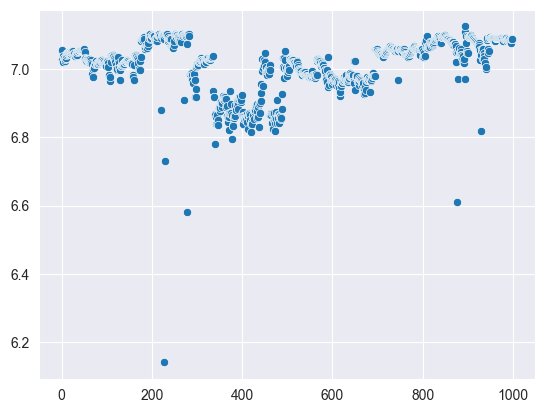

In [4]:
sns.scatterplot(img_entropy_list)

In [5]:
entropy_quantile = np.quantile(img_entropy_list, [0, 0.25, 0.5, 0.75, 1])
first_quantile_idx_list = np.where(img_entropy_list < entropy_quantile[1])[0]
second_quantile_idx_list = np.where(((entropy_quantile[1] <= img_entropy_list) & (img_entropy_list < entropy_quantile[2])))[0]
third_quantile_idx_list = np.where(((entropy_quantile[2] <= img_entropy_list) & (img_entropy_list < entropy_quantile[3])))[0]
fourth_quantile_idx_list = np.where(entropy_quantile[3] < img_entropy_list)[0]

print(entropy_quantile)

[6.14149366 6.97779655 7.026807   7.06444456 7.12376843]


<Axes: >

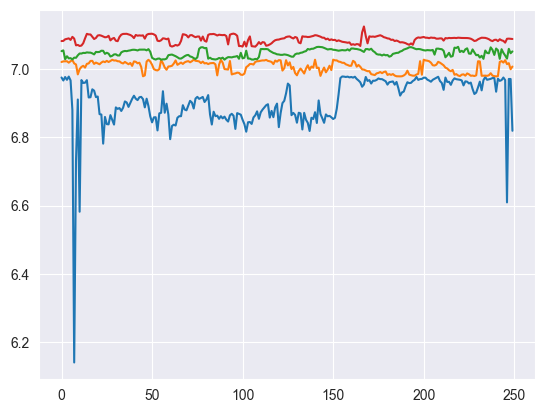

In [6]:
sns.lineplot(np.array(img_entropy_list)[first_quantile_idx_list])
sns.lineplot(np.array(img_entropy_list)[second_quantile_idx_list])
sns.lineplot(np.array(img_entropy_list)[third_quantile_idx_list])
sns.lineplot(np.array(img_entropy_list)[fourth_quantile_idx_list])


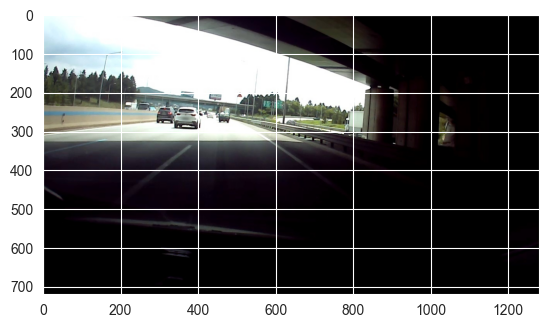

In [7]:
img = cv2.imdecode(img_bin_list[first_quantile_idx_list[10]], cv2.IMREAD_COLOR)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

In [8]:
cpu_usage_list = []
time_list = []

t0 = time.time()
for idx in tqdm(first_quantile_idx_list):
    t0 = time.time()
    img = cv2.imdecode(img_bin_list[idx], cv2.IMREAD_COLOR)
    time_list.append(time.time() - t0)

time_list = np.array(time_list)*1000

  0%|          | 0/250 [00:00<?, ?it/s]

8.137024879455566


<Axes: >

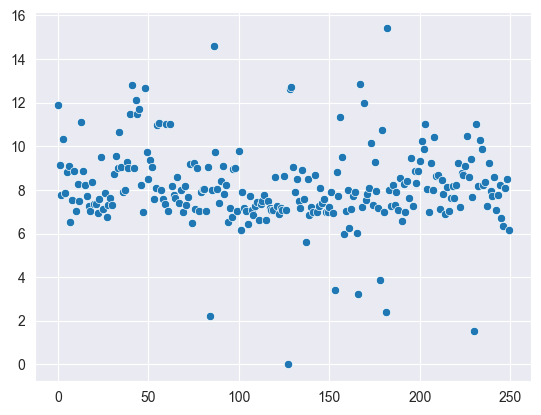

In [9]:
print(time_list.mean())
sns.scatterplot(time_list)

In [10]:
cpu_usage_list = []
time_list = []

t0 = time.time()
for idx in tqdm(second_quantile_idx_list):
    t0 = time.time()
    img = cv2.imdecode(img_bin_list[idx], cv2.IMREAD_COLOR)
    time_list.append(time.time() - t0)

time_list = np.array(time_list)*1000

  0%|          | 0/250 [00:00<?, ?it/s]

11.146446228027344


<Axes: >

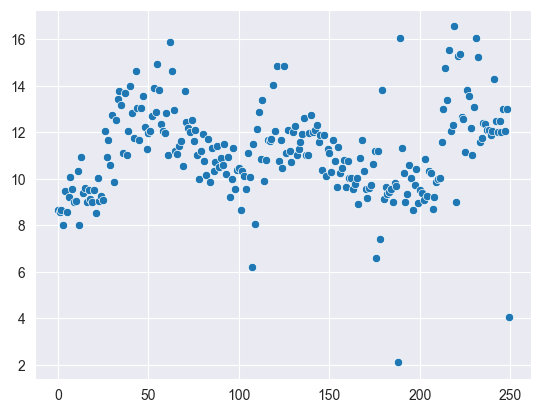

In [11]:
print(time_list.mean())
sns.scatterplot(time_list)

In [12]:
cpu_usage_list = []
time_list = []

t0 = time.time()
for idx in tqdm(third_quantile_idx_list):
    t0 = time.time()
    img = cv2.imdecode(img_bin_list[idx], cv2.IMREAD_COLOR)
    time_list.append(time.time() - t0)

time_list = np.array(time_list)*1000

  0%|          | 0/250 [00:00<?, ?it/s]

12.667938232421875


<Axes: >

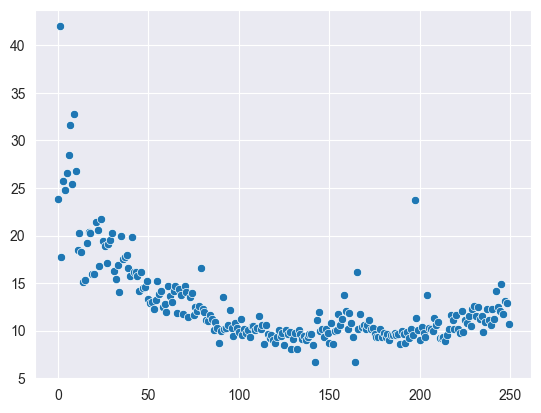

In [13]:
print(time_list.mean())
sns.scatterplot(time_list)

In [14]:
cpu_usage_list = []
time_list = []

t0 = time.time()
for idx in tqdm(fourth_quantile_idx_list):
    t0 = time.time()
    img = cv2.imdecode(img_bin_list[idx], cv2.IMREAD_COLOR)
    time_list.append(time.time() - t0)

time_list = np.array(time_list)*1000

  0%|          | 0/250 [00:00<?, ?it/s]

13.172666549682617


<Axes: >

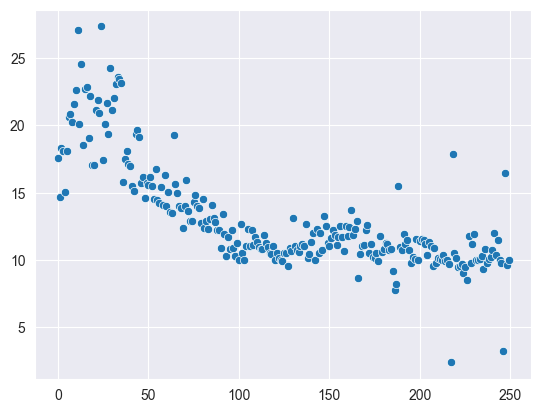

In [15]:
print(time_list.mean())
sns.scatterplot(time_list)